In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns

In [2]:
df=pd.read_csv('preci_all.csv')
df.columns = ['Date','ddate','value','geo']
df['Date'] = df['Date'].astype(str).str[:-2].astype(str)
df['Date'].iloc[43]
df.columns

Index(['Date', 'ddate', 'value', 'geo'], dtype='object')

In [3]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d%H%M')
del df['ddate'],df['geo']
df

,Date,value
0,2000-06-01 00:00:00,0.0
1,2000-06-01 00:30:00,0.0
2,2000-06-01 01:00:00,0.0
3,2000-06-01 01:30:00,0.0
4,2000-06-01 02:00:00,0.0
...,...,...
355008,2020-08-31 08:00:00,0.0
355009,2020-08-31 08:30:00,0.0
355010,2020-08-31 09:00:00,0.0
355011,2020-08-31 09:30:00,0.0


In [4]:
df19 = df[df['Date'].dt.year == 2019]
dfjune = df19[df19['Date'].dt.month == 6]
dfjuly = df19[df19['Date'].dt.month == 7]
dfjune

,Date,value
333072,2019-06-01 00:00:00,0.000000
333073,2019-06-01 00:30:00,0.000000
333074,2019-06-01 01:00:00,0.000000
333075,2019-06-01 01:30:00,0.000000
333076,2019-06-01 02:00:00,0.000000
...,...,...
334507,2019-06-30 21:30:00,0.012116
334508,2019-06-30 22:00:00,0.034064
334509,2019-06-30 22:30:00,0.090474
334510,2019-06-30 23:00:00,0.189140


In [5]:
junemean=dfjune['value'].mean()
junestd=dfjune['value'].std()

In [6]:
julymean=dfjuly['value'].mean()
julystd=dfjuly['value'].std()

In [7]:
diffn1 = julymean - junemean
diffn1

0.535603478553992

In [8]:
months=[]
vec=[]
for i in range(1,13):
    dff = df19[df19['Date'].dt.month == i]
    vec.append(dff['value'].mean())
    vec.append(dff['value'].std())
    months.append(vec)
    vec =[]
npar19 = np.asarray(months)

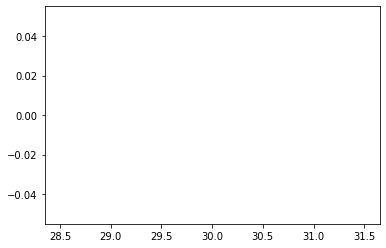

<class 'numpy.float64'>


In [9]:
dfjan = df[df['Date'].dt.year == 2019]
dfjan = dfjan[dfjan['Date'].dt.month == 1]
janmean=dfjan['value'].mean()
janstd=dfjan['value'].std()

bins=30
plt.plot(bins, 1/(janstd * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - janmean )**2 / (2 * janstd**2) ),       linewidth=3, color='y')
plt.show()
print(type(janmean))

C:\Users\Yash Damania\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'seaborn' from 'C:\\Users\\Yash Damania\\miniconda3\\lib\\site-packages\\seaborn\\__init__.py'>

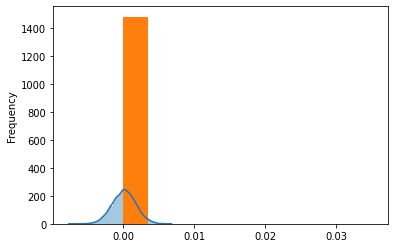

In [10]:
value = np.random.normal(loc=janmean,scale=janstd,size=14880)
sns.distplot(value)
dfjan['value'].plot.hist()
sns

In [14]:
df18 = df[df['Date'].dt.year == 2018]


In [15]:
months18=[]
vec=[]
for i in range(1,13):
    dff = df18[df18['Date'].dt.month == i]
    vec.append(dff['value'].mean())
    vec.append(dff['value'].std())
    months18.append(vec)
    vec =[]
npar18 = np.asarray(months18)

In [16]:
npar18

array([[2.27055278e-04, 1.89551125e-03],
       [8.40202263e-04, 8.05005826e-03],
       [6.21016017e-04, 4.32610421e-03],
       [9.47820640e-03, 7.32201357e-02],
       [2.02320322e-02, 1.38315735e-01],
       [3.61245507e-01, 1.19636204e+00],
       [6.07640713e-01, 1.41308755e+00],
       [3.34687078e-01, 1.10627187e+00],
       [7.91140896e-02, 2.57953414e-01],
       [3.43016200e-02, 1.71134971e-01],
       [1.56804453e-02, 7.89207197e-02],
       [7.76114271e-04, 9.40495600e-03]])

In [17]:
distt = npar19 - npar18

In [18]:
dist = pd.DataFrame(distt,columns=['mean','std'])

In [19]:
dist
cm = sns.light_palette("green", as_cmap=True) 
dist.style.background_gradient(cmap=cm).set_precision(10)

,mean,std
0,-0.0001063178,-0.0002251714
1,-0.0007938030,-0.0076976266
2,-0.0005204730,-0.0036597899
3,0.0071881485,0.0249109172
4,-0.0199674546,-0.1356818444
5,-0.0549481472,-0.3838719974
6,0.2342601257,0.0722434619
7,0.1435381059,0.2273345705
8,0.6235964913,1.7784463846
9,0.2539382470,0.5952363286


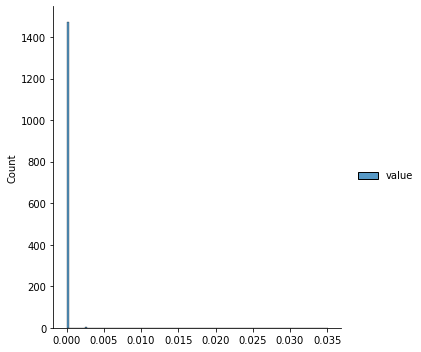

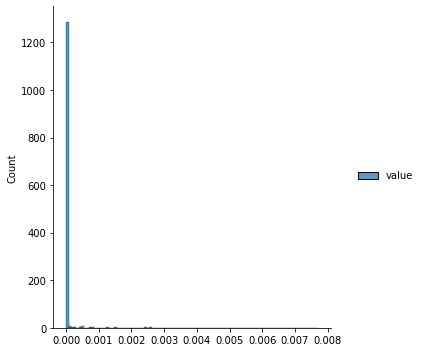

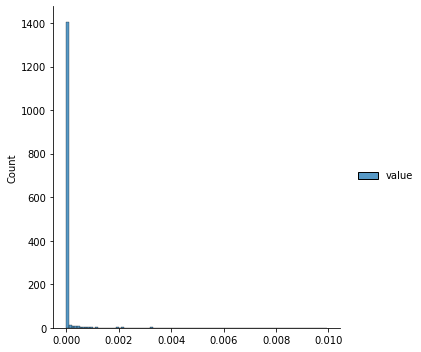

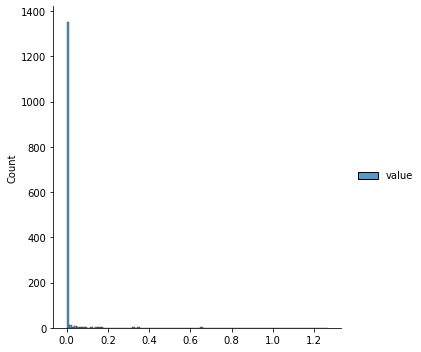

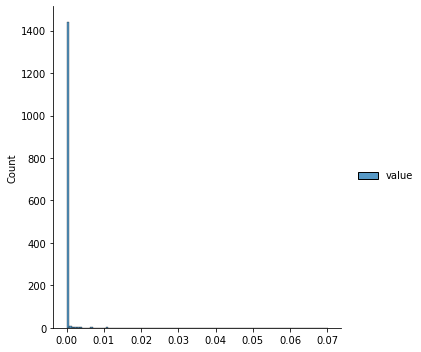

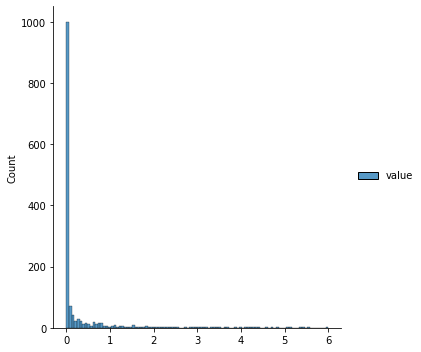

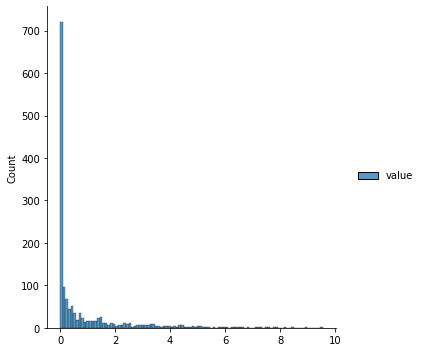

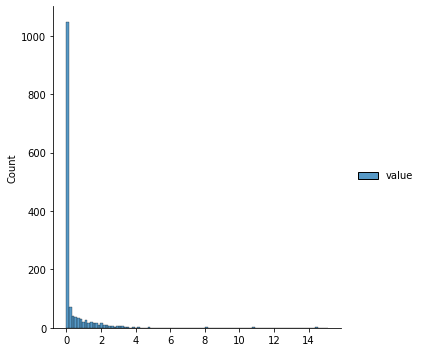

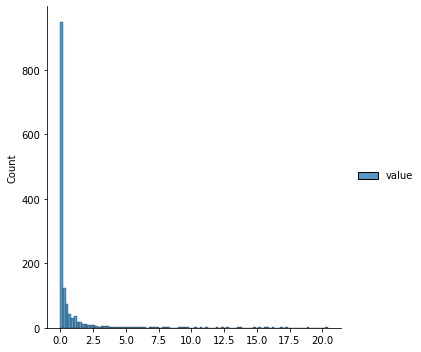

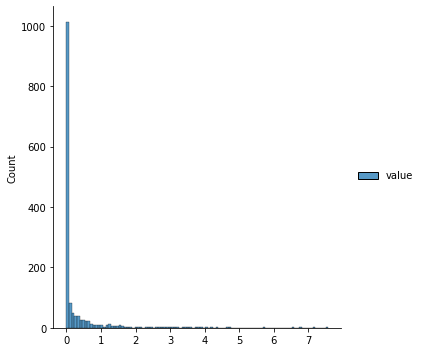

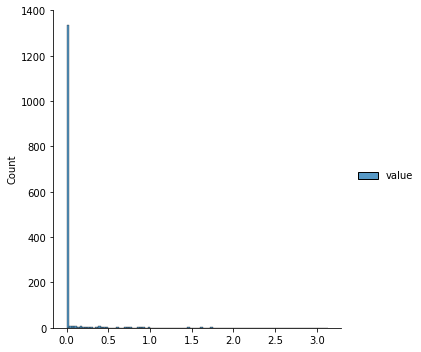

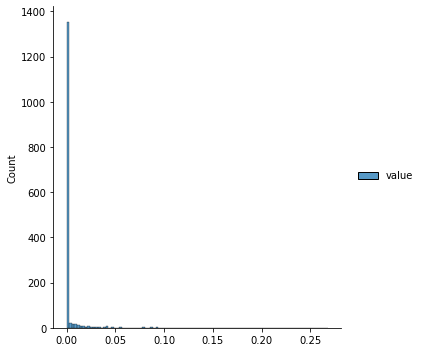

In [24]:
months=[]
vec=[]
for i in range(1,13):
    dff = df19[df19['Date'].dt.month == i]
    sns.displot(dff,bins=100)

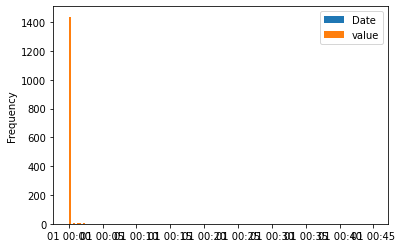

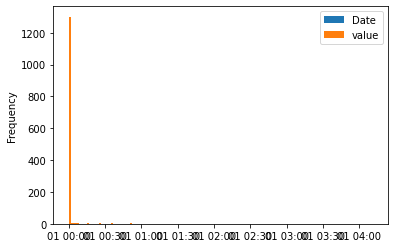

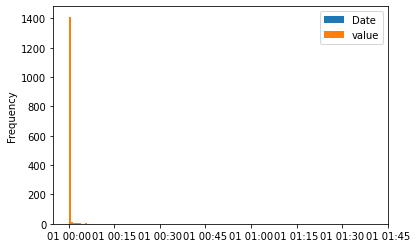

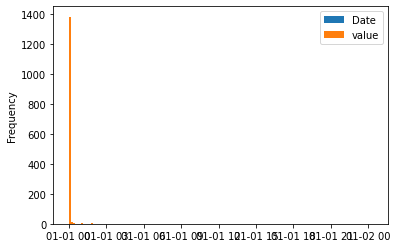

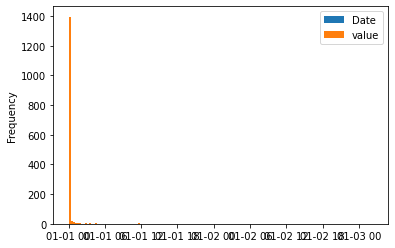

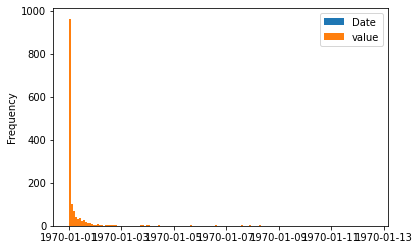

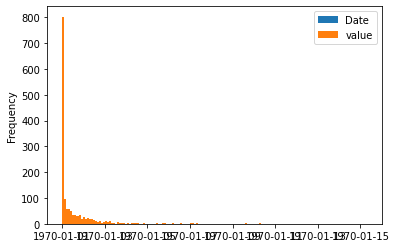

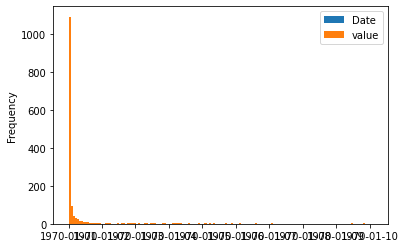

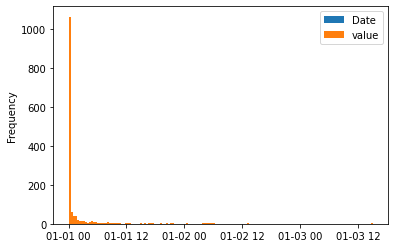

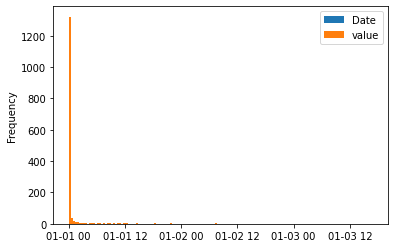

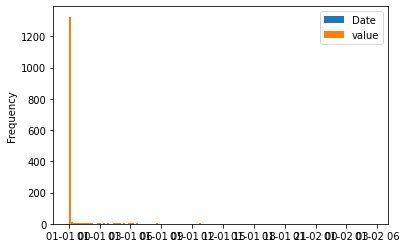

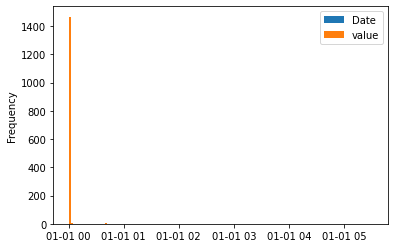

In [112]:
months=[]
vec=[]
for i in range(1,13):
    dff = df18[df18['Date'].dt.month == i]
    dff.plot.hist(bins=150)

    

In [113]:
df19 = df19[(df19.T != 0).any()]
df19

,Date,value
325824,2019-01-01 00:00:00,0.0
325825,2019-01-01 00:30:00,0.0
325826,2019-01-01 01:00:00,0.0
325827,2019-01-01 01:30:00,0.0
325828,2019-01-01 02:00:00,0.0
...,...,...
343339,2019-12-31 21:30:00,0.0
343340,2019-12-31 22:00:00,0.0
343341,2019-12-31 22:30:00,0.0
343342,2019-12-31 23:00:00,0.0
